In [1]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# permite visualizar todas las columnas
pd.options.display.max_columns = None
#%matplotlib inline: para que las gráficas se incluyan en la página. De no usarla, las gráficas aparecen en ventanas aparte.

### DataSet

In [2]:
test= pd.read_csv("C:/Users/Gabriel/Documents/Datasets/titanic/test.csv")
train= pd.read_csv("C:/Users/Gabriel/Documents/Datasets/titanic/train.csv")

In [3]:
print("Los datos de entrenamiento contienen "+ str(train.shape[0])+" filas y "+str(train.shape[1])+" columnas >>")
print(train.columns)

Los datos de entrenamiento contienen 891 filas y 12 columnas >>
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


### EDA: Cuantas variables(columnas) y entradas(filas) tenemos?

In [4]:
print("Varialbes: \t{}\nEntradas:\t{}".format(train.shape[1],train.shape[0]))

Varialbes: 	12
Entradas:	891


Listo para explorar los datos?
Iniciamos verificando cada variable(columns)y el tipo de datos, porcentaje de valor 
faltante,presencia de outliers y tipo de distribución
Al tratarse de un aprendizaje supervisado la variable 'Survived' es 
nuestra variable objetivo (target)

In [5]:
# identificar el tipo de cada variable
display(train.dtypes)
# ver las 5 primeras entradas del conjunto de entrenamiento
display(train.head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Resumen de los datos
print("Resumen:")
print(round(train[["Age","SibSp","Parch","Fare"]].describe().transpose(),1))

Resumen:
       count  mean   std  min   25%   50%   75%    max
Age    714.0  29.7  14.5  0.4  20.1  28.0  38.0   80.0
SibSp  891.0   0.5   1.1  0.0   0.0   0.0   1.0    8.0
Parch  891.0   0.4   0.8  0.0   0.0   0.0   0.0    6.0
Fare   891.0  32.2  49.7  0.0   7.9  14.5  31.0  512.3


In [7]:
# Tipos de Variables 
print("Variables con Texto:")
for i in train.select_dtypes(include = ['object']):
    print("\t\t"+i)

Variables con Texto:
		Name
		Sex
		Ticket
		Cabin
		Embarked


In [8]:
print("Variables Numéricas:")
for i in train.select_dtypes(exclude = ['object']):
    print("\t\t"+i)

Variables Numéricas:
		PassengerId
		Survived
		Pclass
		Age
		SibSp
		Parch
		Fare


In [9]:
print("Variables con Nulos")
missing_val_count = (train.isnull().sum())
print(missing_val_count[missing_val_count > 0])

Variables con Nulos
Age         177
Cabin       687
Embarked      2
dtype: int64


Cual es el porcentaje de valores faltantes?

In [10]:
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

Detalle:
Cabin 77%
Age	20%
Embarket 2%


In [11]:
# Primero revisamos valores unicos de las categoricas
var_cat = [ "Survived", "Pclass", 'Sex', 'Cabin', 'Embarked']
train[var_cat].astype('category')
train[var_cat].nunique()

Survived      2
Pclass        3
Sex           2
Cabin       147
Embarked      3
dtype: int64

Las variables categóricas tienen un bajo número de categorías. 
Cabina tiene 147, lo que su transformación podría generar muchas columnas. 
Analicemos si cabina es relavante o no respecto a la variable de supervivencia

Ahora veamos la distribución estadistica de los datos(Variables numericas)::

In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


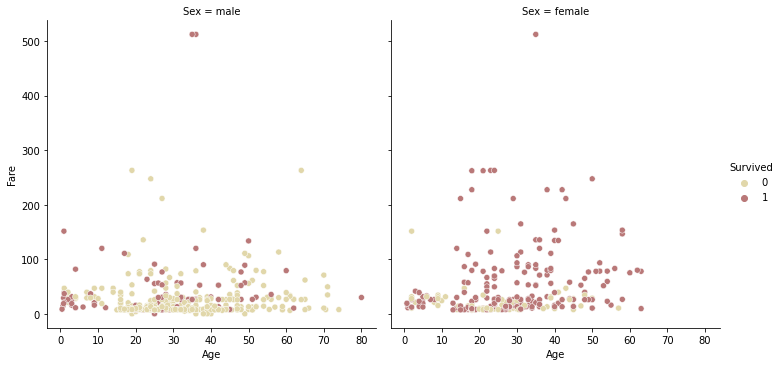

In [13]:
 #Análisis por sexo-edad-tarifa 
sns.relplot(x='Age', y='Fare', data=train,
            kind='scatter', hue='Survived', col='Sex', palette='pink_r')

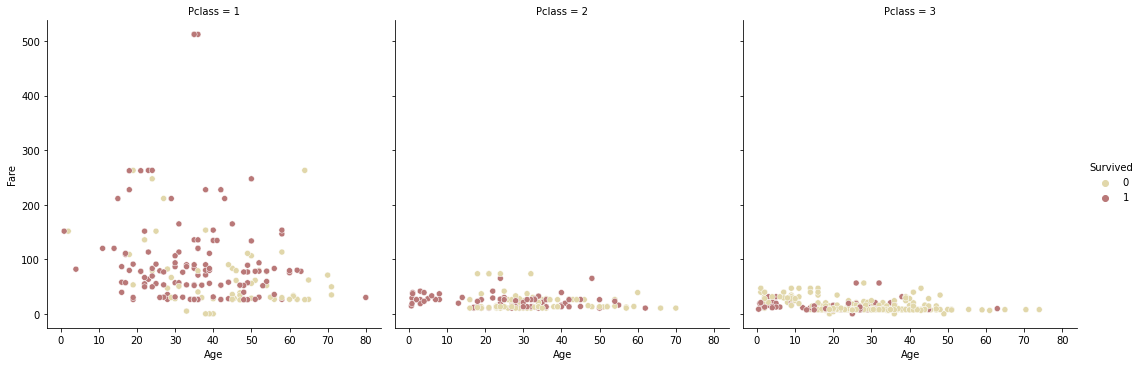

In [14]:
# Análisis por clase 
sns.relplot(x='Age', y='Fare', data=train,
            kind='scatter', hue='Survived', col='Pclass', palette='pink_r')

In [15]:
# Pasaremos la edad a deciles para ver la dispersión más fácilemente con respecto a la tarifa del ticket
#train["Age_q"] = pd.qcut(train['Age'], q=10, precision=0)
#sns.catplot(
#    data=train,
#     x='Age_q',
#     y='Fare',
#     row='Survived',
#     kind='box',
#     height=3, 
#     aspect=4,
#     color='crimson')

<Figure size 1440x720 with 0 Axes>

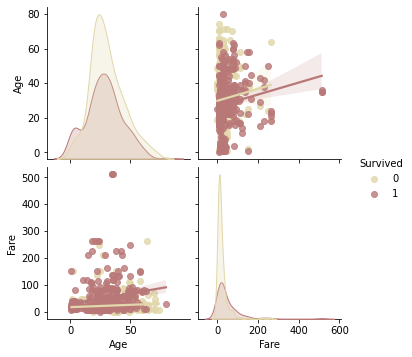

In [16]:
# Finalmente revisado la distribbución y relación de las variables edad y tarifa
plt.figure(figsize=(20, 10))
sns.pairplot(train[["Age","Fare","Survived"]], kind="reg", diag_kind="kde", hue="Survived", palette="pink_r")
plt.show()

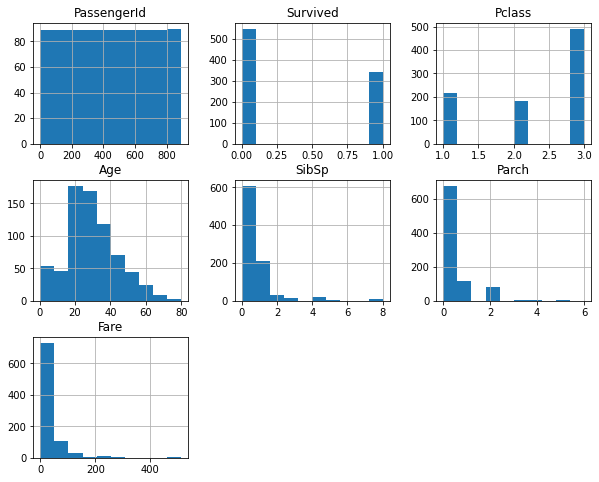

In [17]:
train.hist(figsize=(10,8)); 

Cual es el grupo de persona que tenia más chances de sobrevivir?  
Analicemos la probabilidad de sobrevivir por la variable Embarked,sex,Pclass

In [18]:
train[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [19]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [20]:
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


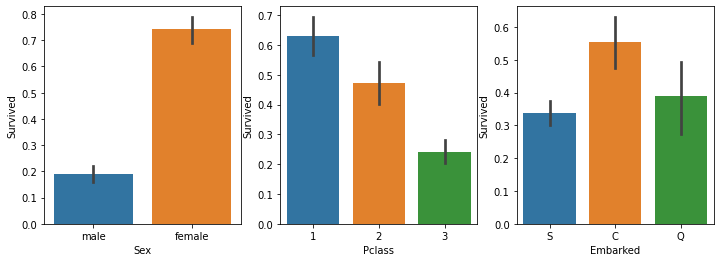

In [21]:
# Plotar los gráficos para Survived vs. Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3);

C:\Users\Gabriel\Documents\Anaconda\Anaconda_\envs\Ambiente\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gabriel\Documents\Anaconda\Anaconda_\envs\Ambiente\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


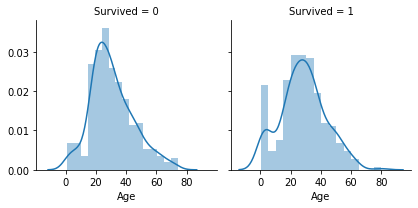

In [22]:
# ver la influência de la edad en la probabilidad de sobrevivencia
age_survived = sns.FacetGrid(train, col='Survived')
#age_survived
age_survived.map(sns.distplot, 'Age')

C:\Users\Gabriel\Documents\Anaconda\Anaconda_\envs\Ambiente\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gabriel\Documents\Anaconda\Anaconda_\envs\Ambiente\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


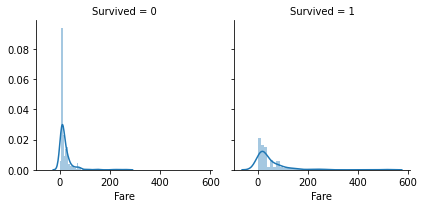

In [23]:
age_survived = sns.FacetGrid(train, col='Survived')
#age_survived
age_survived.map(sns.distplot, 'Fare')

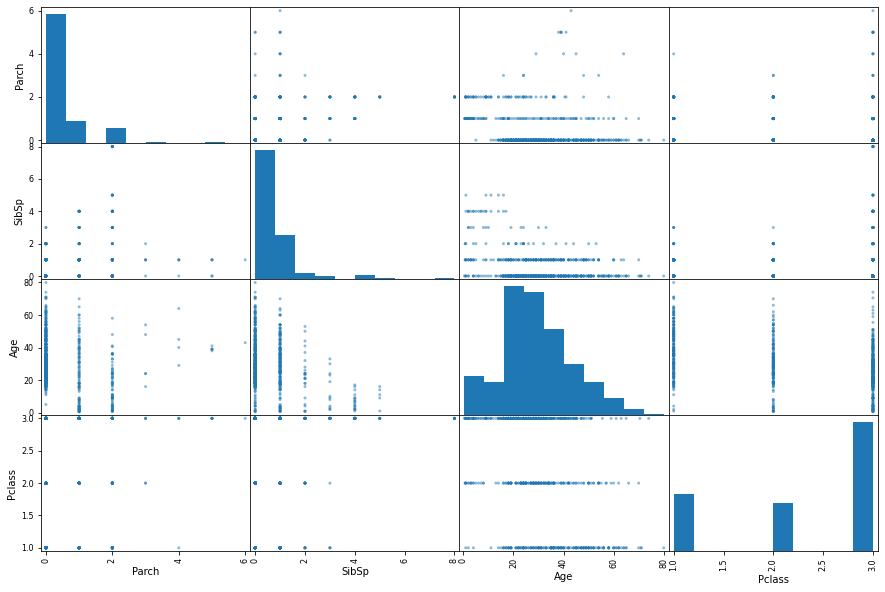

In [24]:
# plotar una scatter matrix
columns=['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(15, 10));

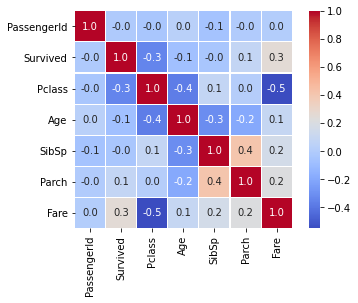

In [25]:
# plotar heatmap para las variables numericas
sns.heatmap(train.corr(), cmap='coolwarm',fmt='.1f',linewidths=0.1,
            vmax=1.0, square=True, linecolor='white',annot=True);

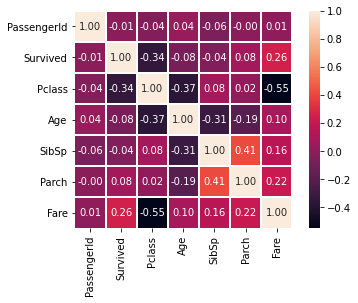

In [26]:
sns.heatmap(train.corr(), square = True, linewidths= .5, annot=True, fmt='.2f');

método df.describe():: para columnas no numericas
train.describe(include=['O']) letra O

In [27]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Rice, Master. Eric",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


## PREPARAMOS LOS DATOS

Lo que estuvimos haciendo fue estructuras de dataframe,formulando hipotesis,
analisis exploratorio, graficos y correllaciones entre variables
El papel de analista es seleccionar cuales seran las variables, features usados 
en el modelo,

Practica: vamos a unir los dataset en un unico dataframe y separarlo al final 
¿Para qué?
Muchas veces vamos a hacer un feature engineering, crear variables, dummy, o 
codificar variables, y bajo esa arquitectura nuestro modelo será entrenado, y
los datos del test van a tener que seguir esa estructura
Es por eso que trabajamos con un unico df

In [28]:
#guardamos los indices de los datasets para recuperarlos despues
train_idx = train.shape[0]
test_idx = test.shape[0]

In [29]:
train_idx

891

In [30]:
test_idx

418

In [31]:
#guardar PassengerId para enviarlo a Kaggle
passengerId = test['PassengerId']

In [32]:
passengerId.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [33]:
print("Varialbes: \t{}\nEntradas:\t{}".format(train.shape[1],train.shape[0]))

Varialbes: 	12
Entradas:	891


In [34]:
print("Varialbes: \t{}\nEntradas:\t{}".format(test.shape[1],test.shape[0]))

Varialbes: 	11
Entradas:	418


In [35]:
#shape[0]= filas o entradas
#shape[1]= Columnas o variables, atributos
train.shape[0],train.shape[1]

(891, 12)

In [36]:
test.shape

(418, 11)

#Survived, es la variable que no está en train, ya que es lo que tenemos que supervisar  
Survived: Informa si el pasajero sobrevivió  
0 = NO
1 = SI

**La columna 'Survived' es excluida del conjunto de datos de entrenamiento**

In [37]:
#train.columns

In [38]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

In [39]:
train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [40]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Concatenar train y test en un solo df

In [41]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
#pandas.concat(objs: Union[Iterable[‘DataFrame’], Mapping[Label, ‘DataFrame’]], axis='0'
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

In [42]:
df_merged.shape

(1309, 11)

In [43]:
df_merged.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [44]:
df_merged.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 11)


Que hacemos con los datos que no suman al modelo? variables/columnas "innecesarias"  
Con que criterio los exluirias?

Pueba: ['PassengerId', 'Name', 'Ticket', 'Cabin'] desconsideremos estas variables

In [46]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [47]:
df_merged.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


### Valores faltantes: 
* **Organizar estos valores arbitrariamente**
* **Exluir linea/fila entera**

In [48]:
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

Para 'age' y 'fare' lo completamos con la mediana y para 'Embarked ' la mayor frecuencia

DataFrame.fillna( valor = Ninguno , método = Ninguno , eje = Ninguno , en el lugar = Falso , límite = Ninguno , abatido = Ninguno)
Llena los valores NA / NaN utilizando el método especificado.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html?highlight=fillna#pandas.DataFrame.fillna

In [49]:
edad_mediana= df_merged['Age'].median()
df_merged['Age'].fillna(edad_mediana, inplace=True)

In [50]:
tarifa_mediana=df_merged['Fare'].median()
df_merged['Fare'].fillna(tarifa_mediana, inplace=True)

In [51]:
embarked_mayor_frec = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_mayor_frec, inplace=True)

In [52]:
df_merged.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Dummy variables:
En estadística y econometría, particularmente en el análisis de regresión, una variable ficticia es aquella que toma solo el valor 0 o 1 para indicar la ausencia o presencia de algún efecto categórico que se puede esperar que cambie el resultado

Sabemos que los modelos matematicos trabajan con variables numéricas,
¿Como transformamos variables categoricas a variables numericas?

In [53]:
# Convertimos 'Sex' en 0 e 1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})


In [54]:
#https://stackoverflow.com/questions/26977076/pandas-unique-values-multiple-columns
# dummies variables para 'Embaked'
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
df_merged['Embarked'].unique()

array(['S', 'C', 'Q', 914], dtype=object)

In [55]:
df_merged['Sex'].value_counts()

0    843
1    466
Name: Sex, dtype: int64

In [56]:
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


Terminamos de preparar el dataset para el modelo, 
ahora a dividir df_merged en train y test:

In [57]:
#con el indice de corte[:]
train = df_merged.iloc[:train_idx]

In [58]:
test = df_merged.iloc[train_idx:]

### Validación y construcción del modelo  
el 80% del proyecto de Cualquier modelo de dataScience es el EDA: Analisis Exploratorio de Datos, la preparacion y el tratamiento de los mismos
*  Modelo de Regresión Logística
*  Modelo de Arbol de desición

In [59]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [60]:
#Para conjuntos de datos pequeños, 'liblinear' es una buena opción
#A modeo de prueba:: Modelo de regresión logistica
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train,target)

# verificamos la presición del modelo
acc_logReg = round(lr_model.score(train,target) * 100, 2)
print("Presición del modelo de Regresión Logistica: {}".format(acc_logReg))

Presición del modelo de Regresión Logistica: 80.13


In [61]:

y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_lr
})

# Generamos el archivo csv
submission.to_csv('C:/Users/Gabriel/Documents/Datasets/titanic/submission_lr_Dic.csv', index=False)

* Modelo de Arbol de desición  
max_depth int, predeterminado = Ninguno
La profundidad máxima del árbol. Si es None, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de min_samples_split muestras.
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [62]:
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)
# verificamos la presición del modelo
acc_tree = round(tree_model.score(train, target) * 100, 2)
print("Presición del modelo:: Arbol de desición: {}".format(acc_tree))

Presición del modelo:: Arbol de desición: 82.72


In [63]:
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_tree
})

# verificamos la presición del modelo
submission.to_csv('C:/Users/Gabriel/Documents/Datasets/titanic/submission_tree_Dic.csv', index=False)